# 手寫辨識 0-9

# Step 1. 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

* 圖形必須為相同尺寸大小
* 資料量必須足夠大：訓練集(training dataset)、驗證集(validation dataset)、測試集(test dataset)

In [3]:
#指定訓練集＋驗證集與測試集, 28x28
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# * 觀察如何標記資料 ? *

In [6]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title = f"idx={idx}, label={labels[idx]}"
        if len(prediction)>0:
            title += f" => {prediction[idx]}"
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

## 資料標記方式

* 以目錄當做標記：將相同標記的圖形放入相同目錄
* 以檔名標記：0_001.jpg, 0_002.jpg ...
* 表格對應：filename001.jpg => 0, filename001.jpg => 1 ...

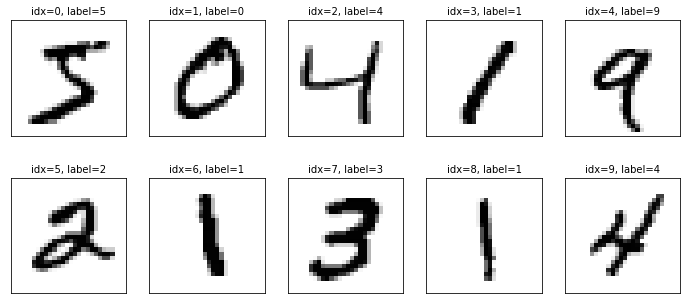

In [7]:
plot_images_labels_prediction(x_train_image, y_train_label, [], 0)

# Step 2. 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense

In [9]:
#宣告採用序列模型
model = Sequential()

In [10]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))


Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal',
                activation='relu'))

In [12]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [13]:
# Layer 1: 784x256 + 256 = 200960
# Layer 2: 256x256 + 256 = 65792
# Layer 3: 256x10 + 10 = 2570
# Total: 200960 + 65792 + 2570 = 269322
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


# Step 3. 訓練模型

In [14]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

* 訓練集(training dataset)(80%)與驗證集(validation dataset)(20%)

In [15]:
train_history = model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 135us/step - loss: 0.2390 - acc: 0.9289 - val_loss: 0.1151 - val_acc: 0.9638
Epoch 2/10
48000/48000 [==============================] - 6s 129us/step - loss: 0.0926 - acc: 0.9721 - val_loss: 0.0999 - val_acc: 0.9709
Epoch 3/10
48000/48000 [==============================] - 6s 133us/step - loss: 0.0613 - acc: 0.9799 - val_loss: 0.0967 - val_acc: 0.9723
Epoch 4/10
48000/48000 [==============================] - 6s 133us/step - loss: 0.0484 - acc: 0.9844 - val_loss: 0.0791 - val_acc: 0.9782
Epoch 5/10
48000/48000 [==============================] - 6s 133us/step - loss: 0.0351 - acc: 0.9893 - val_loss: 0.0914 - val_acc: 0.9761
Epoch 6/10
48000/48000 [==============================] - 7s 153us/step - loss: 0.0310 - acc: 0.9890 - val_loss: 0.0913 - val_acc: 0.9750
Epoch 7/10
48000/48000 [==============================] - 7s 149us/step - 

# 以圖形顯示訓練過程

In [16]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

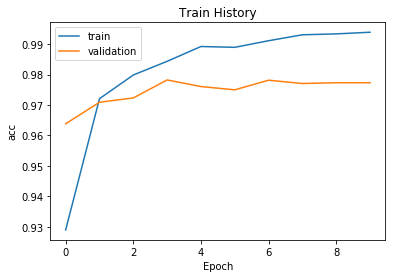

In [17]:
show_train_history(train_history,'acc','val_acc')

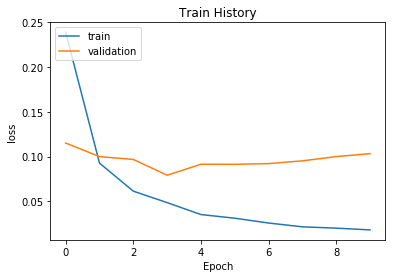

In [18]:
show_train_history(train_history,'loss','val_loss')

# Step 4. 評估模型準確率

In [19]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 25us/step

accuracy= 0.9778


# * 使用模型預測 *

In [20]:
predict_array = model.predict(x_Test_normalize)
predict = np.argmax(predict_array, axis=1)

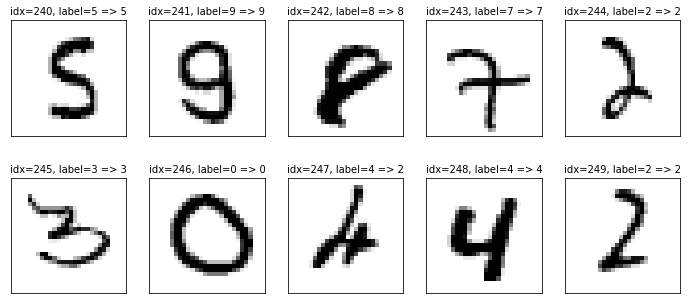

In [21]:
plot_images_labels_prediction(x_test_image, y_test_label, predict, 240)

# * 預測錯誤的圖形 *

In [22]:
def plot_images_labels_prediction_error(images, labels, prediction, diff, start, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        idx = diff[0][i+start]
        ax.imshow(images[idx],cmap='binary')
                
        title = f"idx={idx}, label={labels[idx]}"
        if len(prediction)>0:
            title += f" => {prediction[idx]}"
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

In [23]:
diff = np.where(predict != y_test_label)

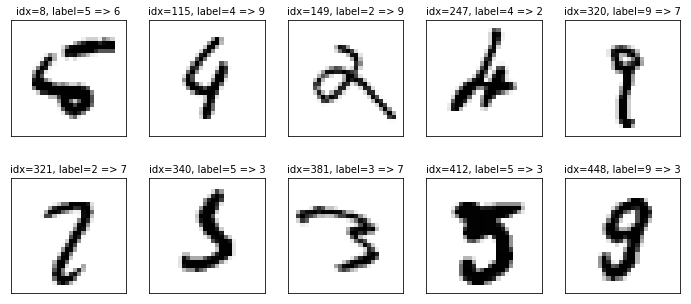

In [24]:
plot_images_labels_prediction_error(x_test_image, y_test_label, predict, diff, 0)

# Step 5. 儲存及載入模型

In [25]:
# HDF5 file, you have to pip3 install h5py if don't have it
# 儲存模型
model.save('mnist_model.h5')

In [26]:
from keras.models import load_model

# 載入模型
load_model = load_model('mnist_model.h5')

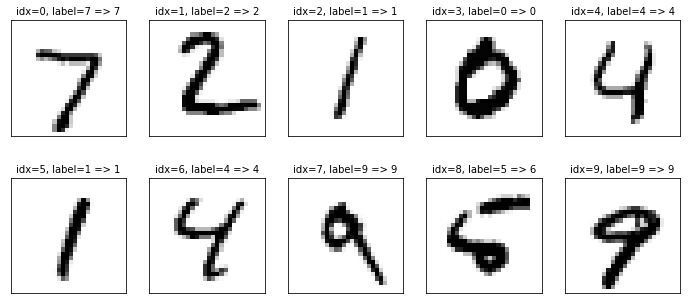

In [27]:
predict_load_array = load_model.predict(x_Test_normalize)
predict_load = np.argmax(predict_load_array, axis=1)
plot_images_labels_prediction(x_test_image, y_test_label, predict_load, 0)

In [28]:
# 儲存權重，不儲存模型
# model.save_weights('my_model_weights.h5')
# model.load_weights('my_model_weights.h5')

In [29]:
# 儲存模型，不儲存權重
# from keras.models import model_from_json
# json_string = model.to_json()
# model = model_from_json(json_string)